# 9.1.1 波方程

什么是波？
波是连续介质的一个扰动并以固定的形状和一定的速度传播。


波的数学形式：
$$
  f(z,t) = f(z-vt,0) = g(z-vt)
  \tag{9.1}
$$

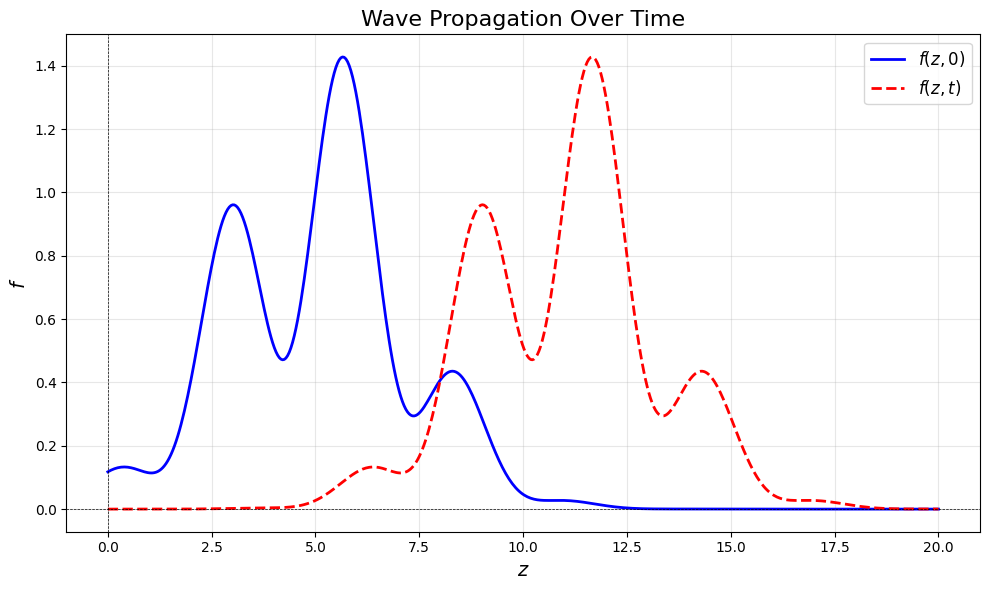

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the wave profile at t=0
def wave_profile(z):
    return np.exp(-0.1 * (z - 5)**2) * (1 + 0.5 * np.sin(2 * np.pi * (z - 5) / 3))

# Parameters
z = np.linspace(0, 20, 500)  # Spatial domain
v = 2  # Wave speed
t = 3  # Time at the second snapshot

# Compute wave profiles
f_z0 = wave_profile(z)  # Wave at t=0
f_zt = wave_profile(z - v * t)  # Wave at t=t

# Plot the wave profiles
plt.figure(figsize=(10, 6))
plt.plot(z, f_z0, label=r"$f(z, 0)$", color="blue", linewidth=2)
plt.plot(z, f_zt, label=r"$f(z, t)$", color="red", linestyle="--", linewidth=2)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")  # Reference line
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")  # Reference line

# Add labels and legends
plt.xlabel(r"$z$", fontsize=14)
plt.ylabel(r"$f$", fontsize=14)
plt.title("Wave Propagation Over Time", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


为何拉紧的弦可以传播波?

数值模拟这一过程可以用 Python 来实现，核心是模拟弦的振动方程，即波动方程：
- 离散化波动方程： 使用有限差分法，将时间和空间离散化。
- 更新公式： 将上述两个公式代入波动方程，得到更新公式：

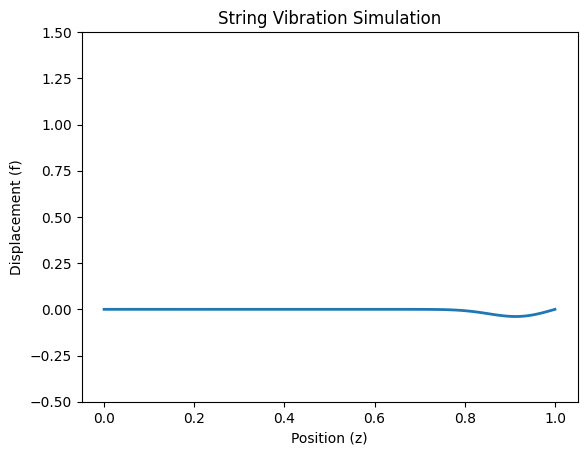

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 参数设置
L = 1.0           # 弦的长度 (m)
T = 10.0          # 弦的张力 (N)
mu = 10.0         # 弦的线密度 (kg/m)
v = np.sqrt(T / mu)  # 波速
dz = 0.01         # 空间步长 (m)
dt = 0.001        # 时间步长 (s)
z_points = int(L / dz) + 1
steps = 500       # 时间步数

# 稳定性条件
#if c * dt / dz > 1:
#    raise ValueError("时间步长太大，不满足稳定性条件 c*dt/dz <= 1")

# 初始化位置数组
z = np.linspace(0, L, z_points)
f = np.zeros(z_points)
f_new = np.zeros(z_points)
f_old = np.zeros(z_points)

# 初始条件: 高斯波包
f = np.exp(-100 * (z - L/2)**2)  # 初始位移

# 初始条件：
#f_old[:] = f  # 静止初始状态
f_old = np.exp(-100 * (z - L/2 + v * dt)**2)

# 动画更新函数
def update(frame):
    global f, f_new, f_old
    # 更新每个空间点
    for i in range(1, z_points - 1):
        f_new[i] = 2 * f[i] - f_old[i] + v**2 * dt**2 / dz**2 * (f[i+1] - 2*f[i] + f[i-1])
    # 边界条件: 固定端点
    f_new[0] = 0
    f_new[-1] = 0
    # 更新历史数据
    f_old[:] = f
    f[:] = f_new
    line.set_ydata(f)
    return line,

# 绘图
fig, ax = plt.subplots()
line, = ax.plot(z, f, lw=2)
ax.set_ylim(-0.5, 1.5)
ax.set_title("String Vibration Simulation")
ax.set_xlabel("Position (z)")
ax.set_ylabel("Displacement (f)")

# 保存动画为 GIF
ani = animation.FuncAnimation(fig, update, frames=steps, interval=30, blit=True)
gif_path = "youyi_simulation.gif"
ani.save(gif_path, writer="pillow", fps=30)


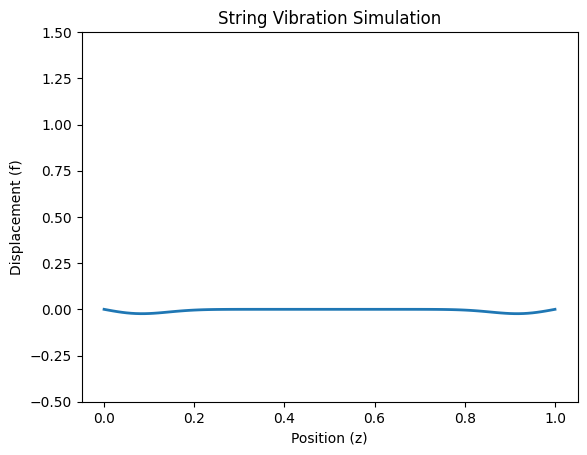

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 参数设置
L = 1.0           # 弦的长度 (m)
T = 10.0          # 弦的张力 (N)
mu = 10.0         # 弦的线密度 (kg/m)
v = np.sqrt(T / mu)  # 波速
dz = 0.01         # 空间步长 (m)
dt = 0.001        # 时间步长 (s)
z_points = int(L / dz) + 1
steps = 500       # 时间步数

# 稳定性条件
#if c * dt / dz > 1:
#    raise ValueError("时间步长太大，不满足稳定性条件 c*dt/dz <= 1")

# 初始化位置数组
z = np.linspace(0, L, z_points)
f = np.zeros(z_points)
f_new = np.zeros(z_points)
f_old = np.zeros(z_points)

# 初始条件: 高斯波包
f = np.exp(-100 * (z - L/2)**2)  # 初始位移

# 初始条件：
f_old[:] = f  # 静止初始状态

# 动画更新函数
def update(frame):
    global f, f_new, f_old
    # 更新每个空间点
    for i in range(1, z_points - 1):
        f_new[i] = 2 * f[i] - f_old[i] + v**2 * dt**2 / dz**2 * (f[i+1] - 2*f[i] + f[i-1])
    # 边界条件: 固定端点
    f_new[0] = 0
    f_new[-1] = 0
    # 更新历史数据
    f_old[:] = f
    f[:] = f_new
    line.set_ydata(f)
    return line,

# 绘图
fig, ax = plt.subplots()
line, = ax.plot(z, f, lw=2)
ax.set_ylim(-0.5, 1.5)
ax.set_title("String Vibration Simulation")
ax.set_xlabel("Position (z)")
ax.set_ylabel("Displacement (f)")

# 保存动画为 GIF
ani = animation.FuncAnimation(fig, update, frames=steps, interval=30, blit=True)
gif_path = "jingzhi_simulation.gif"
ani.save(gif_path, writer="pillow", fps=30)


MovieWriter ffmpeg unavailable; using Pillow instead.


'wave_simulation.gif'

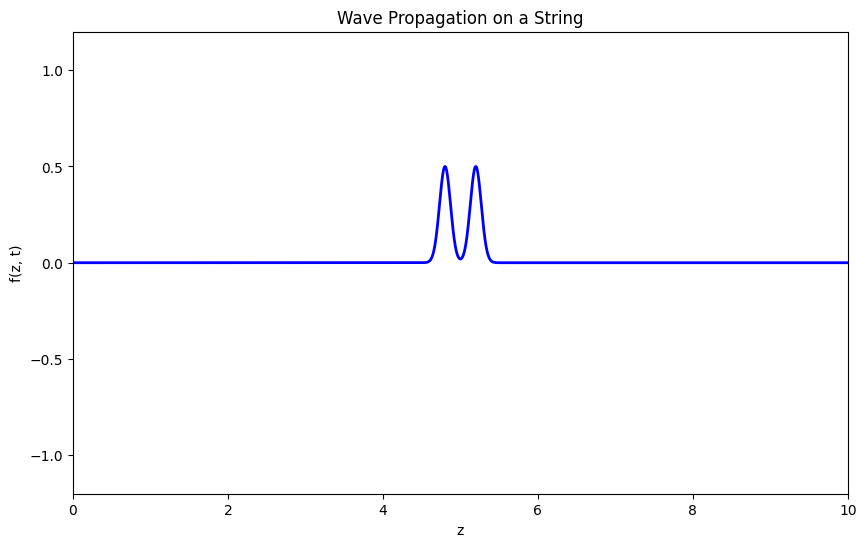

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Simulation parameters
L = 10  # Length of the string
v = 1.0  # Wave speed
dx = 0.001  # Spatial step
dt = 0.01  # Time step
T = 2  # Total simulation time

# Spatial and temporal grid
z = np.arange(0, L + dx, dx)
n_points = len(z)
n_steps = int(T / dt)

# Initial conditions
f = np.zeros((n_steps, n_points))
f[0, :] = np.exp(-100 * (z - L/2)**2)  # Initial wave profile
f[1, :] = f[0, :]  # Zero initial velocity

# Time-stepping loop
for n in range(1, n_steps - 1):
    for i in range(1, n_points - 1):
        f[n + 1, i] = 2 * f[n, i] - f[n - 1, i] + v**2 * (f[n, i + 1] - 2 * f[n, i] + f[n, i - 1])

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(z, f[0, :], color='blue', lw=2)
ax.set_xlim(0, L)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("z")
ax.set_ylabel("f(z, t)")
ax.set_title("Wave Propagation on a String")

def update(frame):
    line.set_ydata(f[frame, :])
    return line,

ani = animation.FuncAnimation(fig, update, frames=n_steps, interval=20, blit=True)

# Save the animation as an MP4 file
output_path = "wave_simulation.gif"
ani.save(output_path, writer='ffmpeg', fps=30)

output_path
